<p  style="text-align: left;font-family: consolas; font-size: 12px; font-weight:bold;">
    author: Tsiapras Tilemachos 
</p>
<p  style="text-align: left;font-family: consolas; font-size: 12px; font-weight:bold;">
    date: 24/03/2022
</p>
<p  style="text-align: left;font-family: consolas; font-size: 12px; font-weight:bold;">
    revision: 1
</p>

<h1 style="text-align: center;font-family: consolas;">
    Click at your discretion
</h1>
<p  style="text-align: center;font-family: consolas; font-size: 18px;">
    Storing spatial coordinated of chosen pixels in image.
</p>


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from numpy.linalg import inv
from tabulate import tabulate
import matplotlib as mpl

In [28]:
imageList = ["holding_target.jpg"]
outFiles  = ["points.csv"]
pointList = [[]]

In [29]:
def pickMatchingPoints(images,outputFiles):
    #for two images
    fd_s = []
    img = []
    def click_event(event, x, y, flags, idx):
        # checking for left mouse clicks
        if event == cv2.EVENT_LBUTTONDOWN:
            #print('[',x, ',', y,'],',end='')
            fd_s[idx].write(str(x)+','+str(y)+'\n')
            cv2.drawMarker(img[idx],(x,y),[0,255,255],markerType=0,markerSize=15,thickness=2)
            cv2.imshow(images[idx], img[idx])
            
    for i,image in enumerate(images):
        img.append(cv2.imread(image, 1))
        fd_s.append(open(outputFiles[i],'w+'))
        
        cv2.imshow(image, img[i])
        cv2.setMouseCallback(image, click_event,i)
      
    # wait for a key to be pressed to exit
    cv2.waitKey(0)

    # close the window
    cv2.destroyAllWindows()
    
    for fd in fd_s:
        fd.close()
#cv::drawMarker (Mat &img, Point position, const Scalar &color, int markerType=MARKER_CROSS, int markerSize=20, int thickness=1, int line_type=8)

In [30]:
# pick the points and then press any button to close the window
pickMatchingPoints(imageList,outFiles)

<p  style="text-align: left;font-family: consolas; font-size: 18px;">
After storing my points in a csv file, I can import them as an array and perform whatever may be required. 
</p>

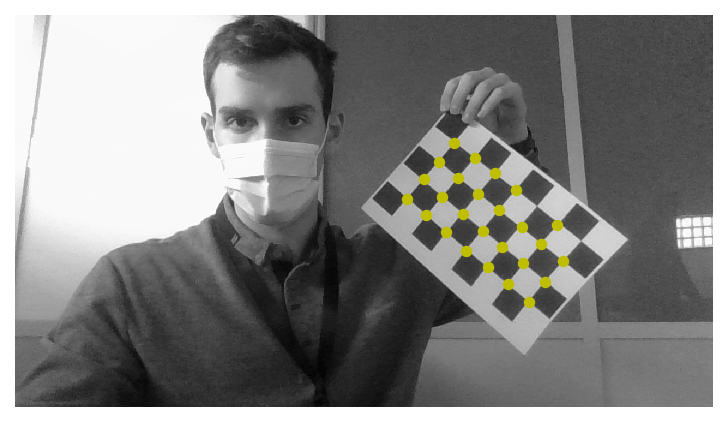

In [37]:
image        = cv2.imread(imageList[0], 0)
image_points = np.genfromtxt(outFiles[0], delimiter=',')

mpl.rcParams['figure.dpi'] =150
_ = plt.imshow(image,cmap="gray")
_ = plt.scatter(image_points[:,0],image_points[:,1],marker="o",s=20,c="y",lw=1)
_ = plt.axis("off")

<p  style="text-align: left;font-family: consolas; font-size: 18px;">
This method can be used in order to choose matching point between images or logging the location of items in the image for labeling purposes. In my case i used this for labeling a dataset that contained images with small objects that should be spatialy located. No bounding box was reqiured. Many applications require ounding boxes, so a enriched version of this notebook will be available.</p>

<h1 style="text-align: center;font-family: consolas;">
    TBC
</h1>